### 주제: 심리성향 데이터를 활용한 인간의 성격 변화에 영향을 줄 수 있는 요인 분석

#### 데이터 전처리

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

In [47]:
data = pd.read_csv('/Users/junhyuk/Library/CloudStorage/OneDrive-연세대학교(YonseiUniversity)/DSL/DSL 기초세션/EDA/data.csv')

In [48]:
# 첫째 column 삭제
data.drop(["index"], axis=1, inplace=True)

In [49]:
#필요한 열만으로 편집
data = data[['age_group','education','familysize', 'married','urban',
             'tp01','tp02','tp03','tp04','tp05','tp06','tp07','tp08','tp09', 'tp10']]

In [50]:
#tp 점수 변환
data['tp01']=7-data['tp01']
data['tp02']=7-data['tp02']
data['tp03']=7-data['tp03']
data['tp04']=7-data['tp04']
data['tp05']=7-data['tp05']
data['tp06']=7-data['tp06']
data['tp07']=7-data['tp07']
data['tp08']=7-data['tp08']
data['tp09']=7-data['tp09']
data['tp10']=7-data['tp10']

In [51]:
#50대 이상의 표본 수가 적으므로 50대 이상을 합침
data['age_group'] = data['age_group'].apply(lambda x:'+50s' 
                                            if x in ['50s','60s','+70s'] else x)

In [52]:
#가족 수가 6이상인 숫자가 적으므로 가족 수가 6이상인걸 하나로 합치기
data['familysize']=data['familysize'].apply(lambda x:'+6'if x >=6 else x)

#### 변수 설명



*   age_group : 연령대(10대,20대,30대,40대,50대이상)

*   education : 교육수준(1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답)

*   familysize : 형제자매 수(6명이상은 통합)

*   married : 혼인 상태 (1=Never married, 2=Currently married, 3=Previously married, 0=Other)

*   urban : 유년기의 거주 구역 (1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답)

*   tp01: 활발하고 열정적인
*   tp02: 따지기를 좋아하고 다투기를 잘하는


*   tp03: 믿음직스럽고 자기관리가 가능한


*   tp04: 불안하고 화를 잘 내는


*   tp05: 새로운 경험을 마다하지 않으며 여러가지로 생각해보는


*   tp06: 내향적이고 조용한



*   tp07: 동정심이 많고 다정한
*   tp08: 계획적이지 않고 조심성 없는


*   tp09: 침착하고 기분이 안정된
*   tp10: 변화를 싫어하며 창의적이지 않은



In [10]:
data.head(10)

,age_group,education,familysize,married,urban,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10
0,30s,2,4,3,1,5,5,5,6,5,6,0,3,3,4
1,20s,4,3,1,3,6,6,7,7,6,5,4,3,7,3
2,30s,3,3,2,2,5,4,6,2,4,3,5,1,6,4
3,20s,4,0,1,3,5,3,6,6,6,4,6,4,6,4
4,20s,3,2,2,1,6,6,6,1,7,5,7,1,5,1
5,40s,2,+6,3,2,2,2,2,3,2,4,4,0,2,4
6,20s,2,3,1,2,5,3,4,2,6,6,4,5,6,2
7,30s,2,1,1,2,4,1,7,7,7,7,7,6,5,1
8,20s,4,0,1,1,6,6,5,6,5,5,5,5,5,4
9,+50s,3,3,1,2,7,6,6,5,7,4,7,3,6,2


In [53]:
#무응답 제거
tp01 = data[data['tp01']!=0]
tp02 = data[data['tp02']!=0]
tp03 = data[data['tp03']!=0]
tp04 = data[data['tp04']!=0]
tp05 = data[data['tp05']!=0]
tp06 = data[data['tp06']!=0]
tp07 = data[data['tp07']!=0]
tp08 = data[data['tp08']!=0]
tp09 = data[data['tp09']!=0]
tp10 = data[data['tp10']!=0]

In [12]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [13]:
col=['#2913E8','#5789F7','#A0CBFF','#5271FF','#57A2F7','#2ECBFF','#7214FF','#8771FF','#892EE8']

#### 연령대에 따른 성격 특성 변화

In [18]:
#피벗테이블 생성
for i in ['tp01','tp02','tp03','tp04','tp05','tp06','tp07','tp08','tp08','tp09','tp10']:
    globals()['{}_age'.format(i)] = pd.pivot_table(data=globals()['{}'.format(i)], index='age_group', columns=i,aggfunc='size')
    globals()['{}_age'.format(i)] = globals()['{}_age'.format(i)].reindex(['10s','20s','30s','40s','+50s'])
    globals()['{}_age'.format(i)] = globals()['{}_age'.format(i)].div(globals()['{}_age'.format(i)].sum(axis=1), axis=0) * 100

##### tp01/02(윤서)

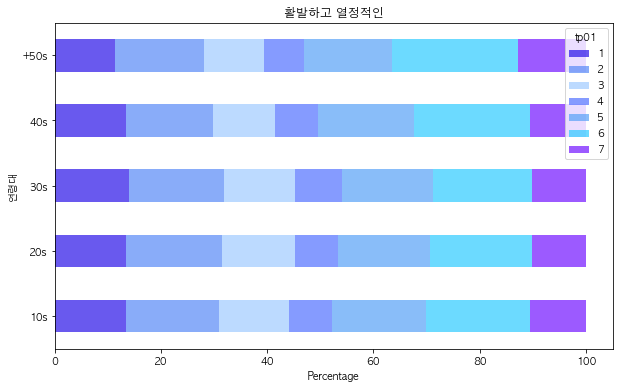

In [19]:
# tp01 연령대별 응답 비율
tp01_age.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('연령대')
plt.title('활발하고 열정적인')
plt.show()

Text(0.5, 1.0, '활발하고 열정적인')

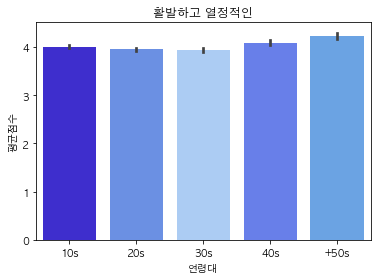

In [20]:
# tp 01 연령대별 응답 평균
sns.barplot(data=tp01 ,x='age_group',y='tp01',order=['10s','20s','30s','40s','+50s'],palette=col)
plt.ylabel('평균점수')
plt.xlabel('연령대')
plt.title('활발하고 열정적인')

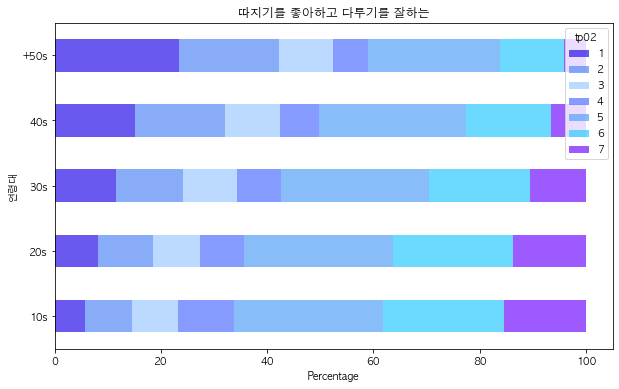

In [21]:
# tp02 연령대별 응답 비율
tp02_age.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('연령대')
plt.title('따지기를 좋아하고 다투기를 잘하는')
plt.show()

Text(0.5, 1.0, '따지기를 좋아하고 다투기를 잘하는')

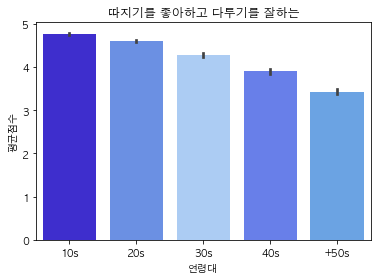

In [22]:
# tp 02 연령대별 응답 평균
sns.barplot(data=tp02 ,x='age_group',y='tp02',order=['10s','20s','30s','40s','+50s'],palette=col)
plt.ylabel('평균점수')
plt.xlabel('연령대')
plt.title('따지기를 좋아하고 다투기를 잘하는')

> tp01의 경우 연령대가 증가할수록 자신이 외향적이고 열정적이라고 생각하는 비율이 미약하게 증가하지만 연령대에 따라 크게 달라지지는 않음. 반면 tp02의 경우 연령대가 증가함에 따라 자신이 비판적이고 싸우기를 좋아하는 성격이 아니라고 답하는 비율이 현저하게 증가하며 연령대별 차이가 뚜렷하게 나타남

##### tp03/04 (재우)

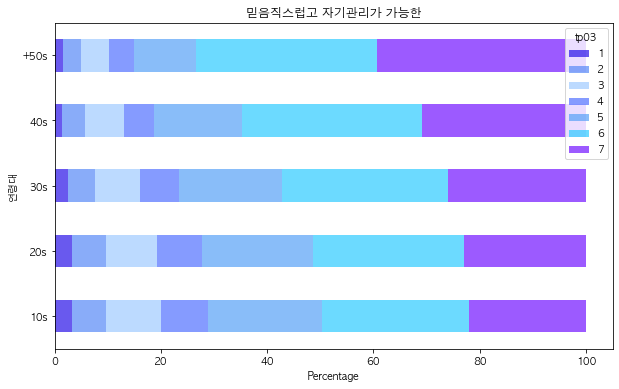

In [23]:
# tp03 연령대별 응답 비율
tp03_age.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('연령대')
plt.title('믿음직스럽고 자기관리가 가능한')
plt.show()

Text(0.5, 1.0, '믿음직스럽고 자기관리가 가능한')

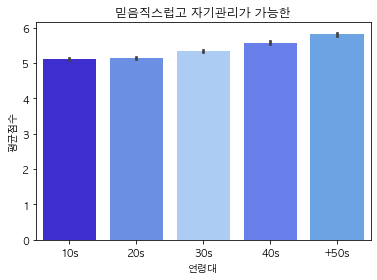

In [26]:
# tp 03 연령대별 응답 평균
sns.barplot(data=tp03 ,x='age_group',y='tp03',order=['10s','20s','30s','40s','+50s'],palette=col)
plt.ylabel('평균점수')
plt.xlabel('연령대')
plt.title('믿음직스럽고 자기관리가 가능한')

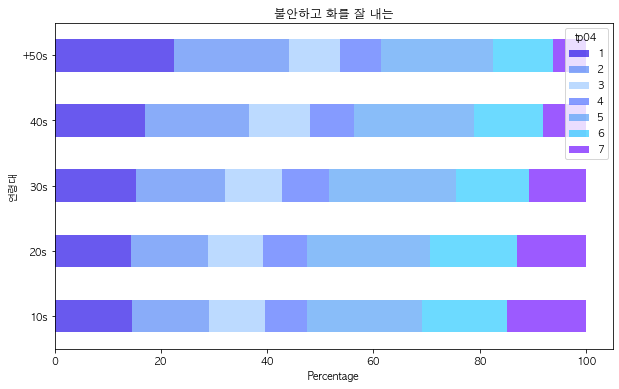

In [27]:
# tp04 연령대별 응답 비율
tp04_age.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('연령대')
plt.title('불안하고 화를 잘 내는')
plt.show()

Text(0.5, 1.0, '불안하고 화를 잘 내는')

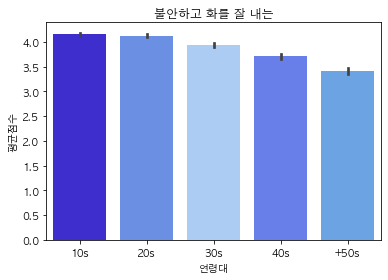

In [28]:
# tp 04 연령대별 응답 평균
sns.barplot(data=tp04 ,x='age_group',y='tp04',order=['10s','20s','30s','40s','+50s'],palette=col)
plt.ylabel('평균점수')
plt.xlabel('연령대')
plt.title('불안하고 화를 잘 내는')

> tp 03 : 본인이 신뢰할 수 있는 성격이라고 답한 사람들의 비율은 10대가 가장 낮았고, 50대 이상이 가장 높았다. 즉, 연령대가 높아질수록 본인이 신뢰할 수 있는 성격의 소유자라고 생각하는 사람들이 많다는 것을 알 수 있다. 흥미로운 점은, 응답 평균을 구해보았을 때 모든 연령대에서 5점대의 점수가 나왔다는 점이다. 대부분 본인이 신뢰할 수 있는 성격을 가졌다고 생각하였지만, 여기서도 연령대가 높을수록 더 동의하는 경향이 높다는 것을 알 수 있다.
> tp 04 : 불안해하는 성격은 10대가 가장 많은 비율로 동의하고 50대 이상이 가장 적은 비율로 동의하는 것을 알 수 있다. 50대 이상을 제외한 모든 연령대에서 5번을 선택한 비중이 가장 높았고, 50대 이상은 1번을 선택한 비중이 가장 높은 것을 알 수 있다. 하지만 가장 높게 차지한 비율이 모두 20%대라는 점에서 불안해하는 성격에 대한 응답은 다른 응답들에 비해 골고루 퍼져있다는 것을 알 수 있다. 응답의 평균을 구해보면 연령대가 높아질수록 동의하지 않는 비율이 높아지며, 10대와 50대 이상의 평균 응답은 1점 차이가 난다는 것을 알 수 있다. 연령대가 높아질수록 본인이 불안해하는 성격이라는 것에 동의하지 않는 비율이 높아진다는 것을 알 수 있다.

##### tp05/06(영서, 종민)

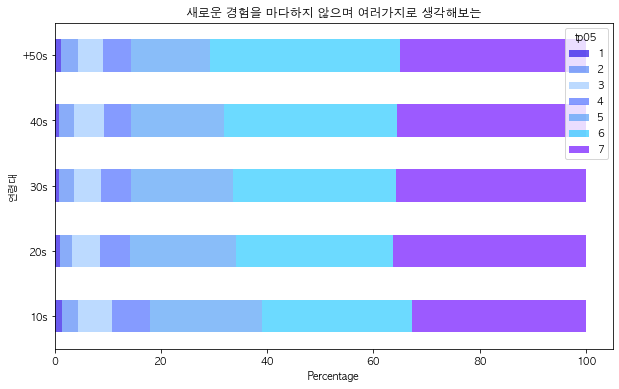

In [29]:
# tp05 연령대별 응답 비율
tp05_age.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('연령대')
plt.title('새로운 경험을 마다하지 않으며 여러가지로 생각해보는')
plt.show()

Text(0.5, 1.0, '새로운 경험을 마다하지 않으며 여러가지로 생각해보는')

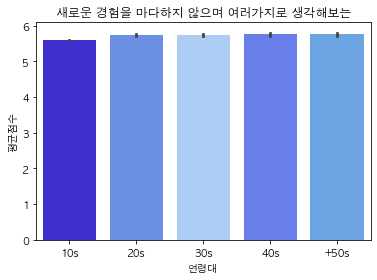

In [30]:
# tp 05 연령대별 응답 평균
sns.barplot(data=tp05 ,x='age_group',y='tp05',order=['10s','20s','30s','40s','+50s'],palette=col)
plt.ylabel('평균점수')
plt.xlabel('연령대')
plt.title('새로운 경험을 마다하지 않으며 여러가지로 생각해보는')

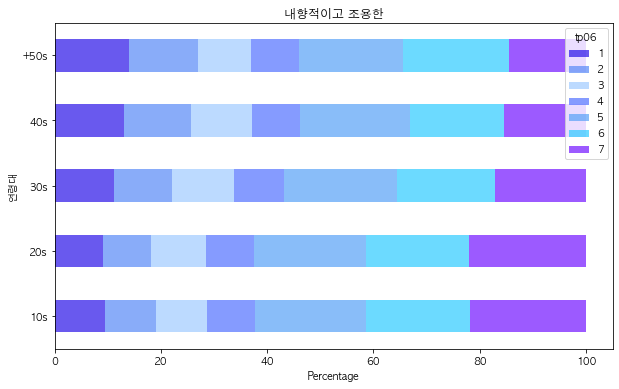

In [31]:
# tp06 연령대별 응답 비율
tp06_age.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('연령대')
plt.title('내향적이고 조용한')
plt.show()

Text(0.5, 1.0, '내향적이고 조용한')

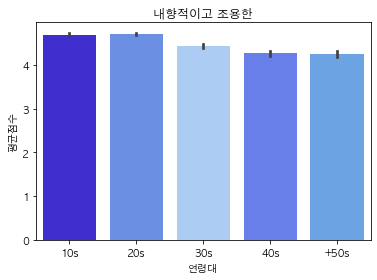

In [32]:
# tp 06 연령대별 응답 평균
sns.barplot(data=tp06 ,x='age_group',y='tp06',order=['10s','20s','30s','40s','+50s'],palette=col)
plt.ylabel('평균점수')
plt.xlabel('연령대')
plt.title('내향적이고 조용한')

> tp05의 경우 연령대가 올라가며 약간씩 평균점수 및 동의가 증가하며 tp06의 경우 연령대가 올라갈수록 반대 현상을 보여준다

##### tp07/08(진우)

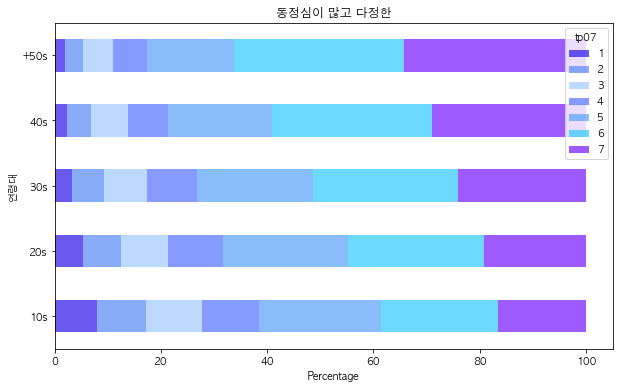

In [33]:
# tp07 연령대별 응답 비율
tp07_age.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('연령대')
plt.title('동정심이 많고 다정한')
plt.show()

Text(0.5, 1.0, '동정심이 많고 다정한')

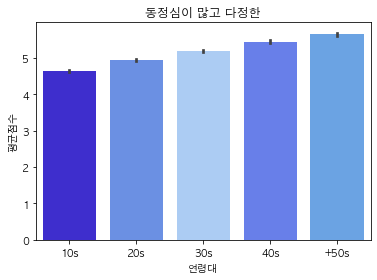

In [34]:
# tp 07 연령대별 응답 평균
sns.barplot(data=tp07 ,x='age_group',y='tp07',order=['10s','20s','30s','40s','+50s'],palette=col)
plt.ylabel('평균점수')
plt.xlabel('연령대')
plt.title('동정심이 많고 다정한')

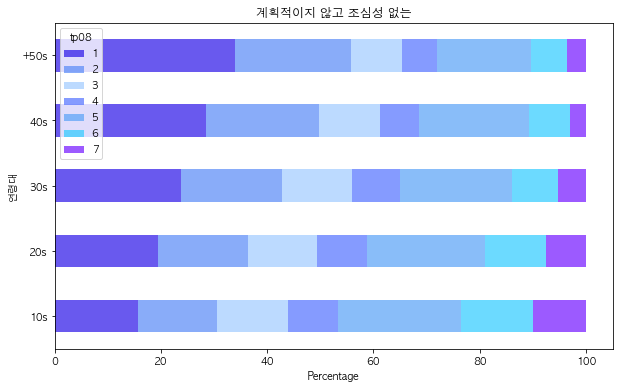

In [41]:
# tp08 연령대별 응답 비율
tp08_age.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('연령대')
plt.title('계획적이지 않고 조심성 없는')
plt.show()

Text(0.5, 1.0, '계획적이지 않고 조심성 없는')

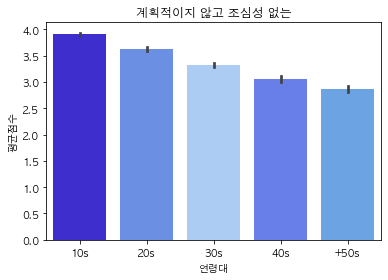

In [67]:
# tp 08 연령대별 응답 평균
sns.barplot(data=tp08 ,x='age_group',y='tp08',order=['10s','20s','30s','40s','+50s'],palette=col)
plt.ylabel('평균점수')
plt.xlabel('연령대')
plt.title('계획적이지 않고 조심성 없는')

> tp07의 경우 연령이 높아질수록 평균점수 및 강력한 동의 비율이 늘어난다. 반대로 tp08의 경우 연령이 높아질수록 평균점수 및 동의 비율이 낮아진다.

##### tp09/10(준혁)

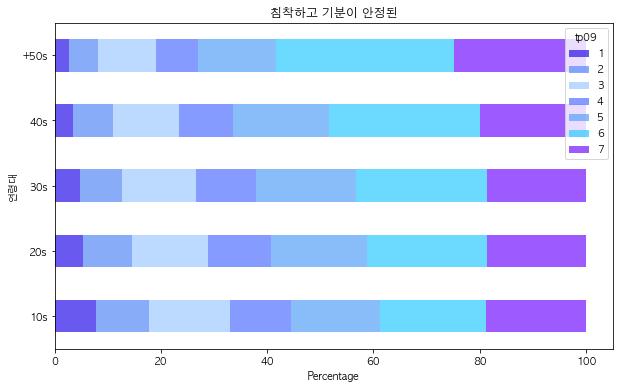

In [37]:
# tp09 연령대별 응답 비율
tp09_age.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('연령대')
plt.title('침착하고 기분이 안정된')
plt.show()

Text(0.5, 1.0, '침착하고 기분이 안정된')

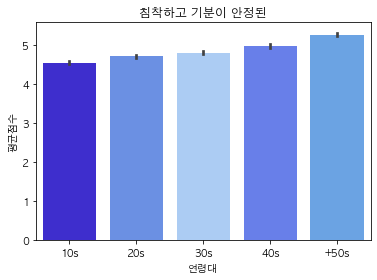

In [38]:
# tp 09 연령대별 응답 평균
sns.barplot(data=tp09 ,x='age_group',y='tp09',order=['10s','20s','30s','40s','+50s'],palette=col)
plt.ylabel('평균점수')
plt.xlabel('연령대')
plt.title('침착하고 기분이 안정된')

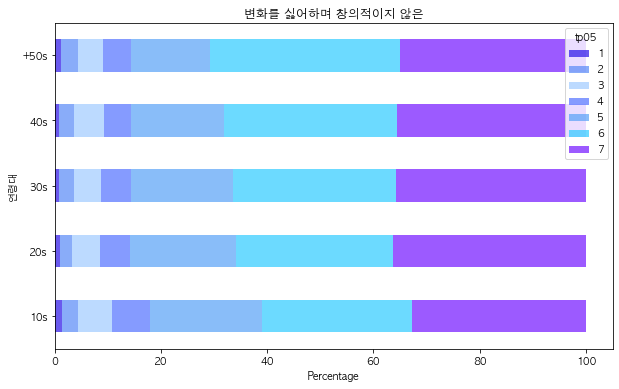

In [39]:
# tp10 연령대별 응답 비율
tp05_age.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('연령대')
plt.title('변화를 싫어하며 창의적이지 않은')
plt.show()

Text(0.5, 1.0, '변화를 싫어하며 창의적이지 않은')

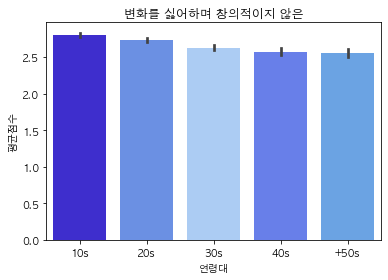

In [66]:
# tp 10 연령대별 응답 평균
sns.barplot(data=tp10 ,x='age_group',y='tp10',order=['10s','20s','30s','40s','+50s'],palette=col)
plt.ylabel('평균점수')
plt.xlabel('연령대')
plt.title('변화를 싫어하며 창의적이지 않은')

> tp09의 경우 연령대가 올라가며 평균점수 및 동의의 비율이 높아지고 반대로 tp10의 경우 연령대가 올라가면서 평균점수 및 동의의 비율이 낮아진다

#### 교육수준에 따른 성격 변화(질문 배분은 위와 같음)

In [59]:
#피벗테이블 생성
for i in ['tp01','tp02','tp03','tp04','tp05','tp06','tp07','tp08','tp08','tp09','tp10']:
    globals()['{}_edu'.format(i)] = pd.pivot_table(data=globals()['{}'.format(i)], index='education', columns=i,aggfunc='size')
    globals()['{}_edu'.format(i)] = globals()['{}_edu'.format(i)].div(globals()['{}_edu'.format(i)].sum(axis=1), axis=0) * 100
    globals()['{}_edu'.format(i)].drop([0], inplace=True)

##### tp01/02

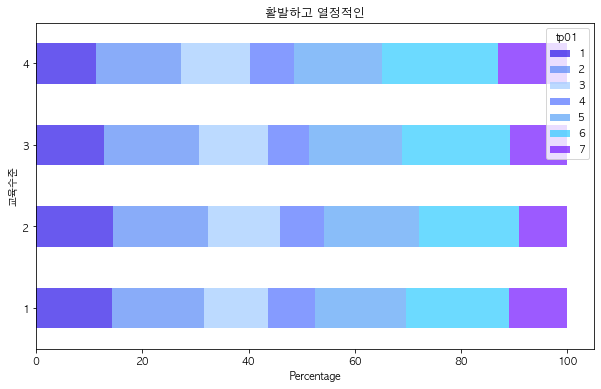

In [68]:
# tp01응답 비율
tp01_edu.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('교육수준')
plt.title('활발하고 열정적인')
plt.show()

Text(0.5, 1.0, '활발하고 열정적인')

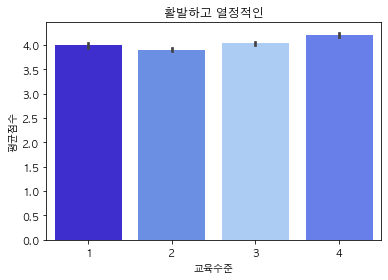

In [73]:
# tp01 응답 평균
tp1_edu = tp01[tp01['education']!=0]
sns.barplot(data=tp1_edu ,x='education',y='tp01',palette=col)
plt.ylabel('평균점수')
plt.xlabel('교육수준')
plt.title('활발하고 열정적인')

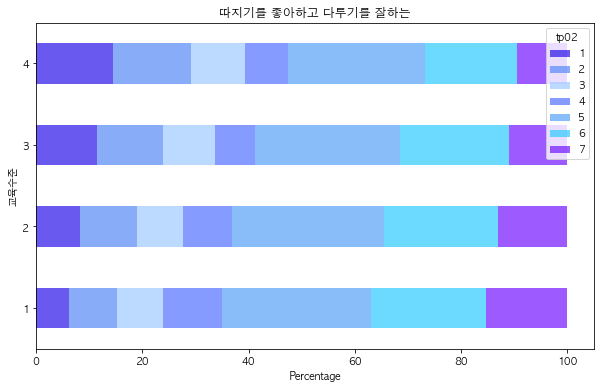

In [70]:
# tp02 응답 비율
tp02_edu.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('교육수준')
plt.title('따지기를 좋아하고 다투기를 잘하는')
plt.show()

Text(0.5, 1.0, '따지기를 좋아하고 다투기를 잘하는')

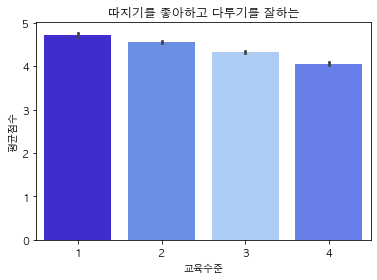

In [74]:
# tp02 응답 평균
tp2_edu = tp02[tp02['education']!=0]
sns.barplot(data=tp2_edu ,x='education',y='tp02',palette=col)
plt.ylabel('평균점수')
plt.xlabel('교육수준')
plt.title('따지기를 좋아하고 다투기를 잘하는')

> 교육수준에 따라 외향적인 성격특성은 큰 차이 없지만 교육수준이 높아짐에 따라(고졸미만->석박사) 싸우기를 좋아하는 성향이 줄어드는 것을 볼 수 있다

##### tp03/04

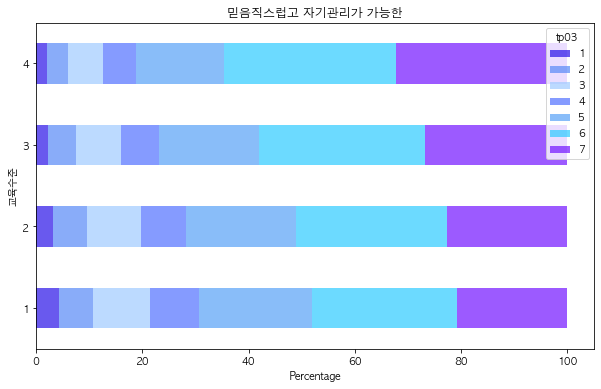

In [75]:
# tp03 응답 비율
tp03_edu.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('교육수준')
plt.title('믿음직스럽고 자기관리가 가능한')
plt.show()

Text(0.5, 1.0, '믿음직스럽고 자기관리가 가능한')

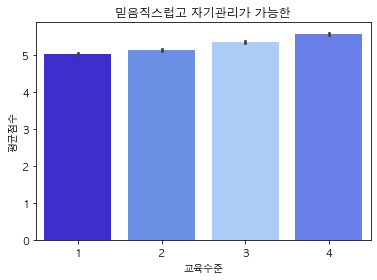

In [76]:
# tp03 응답 평균
tp3_edu = tp03[tp03['education']!=0]
sns.barplot(data=tp3_edu ,x='education',y='tp03',palette=col)
plt.ylabel('평균점수')
plt.xlabel('교육수준')
plt.title('믿음직스럽고 자기관리가 가능한')

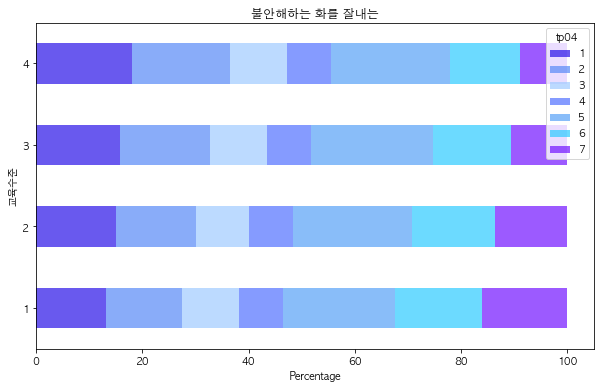

In [77]:
# tp04 응답 비율
tp04_edu.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('교육수준')
plt.title('불안해하는 화를 잘내는')
plt.show()

Text(0.5, 1.0, '불안해하는 화를 잘내는')

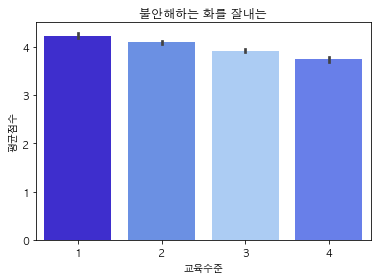

In [78]:
# tp04 응답 평균
tp4_edu = tp04[tp04['education']!=0]
sns.barplot(data=tp4_edu ,x='education',y='tp04',palette=col)
plt.ylabel('평균점수')
plt.xlabel('교육수준')
plt.title('불안해하는 화를 잘내는')

> 교육수준이 높을수록 본인이 신뢰할 수 있는 성격의 소유자라는 것에 동의하는 비율이 높은 것으로 나타났다.
그리고 교육수준이 높을수록 본인이 불안해하는 성격의 소유자라는 것에 동의하는 비율이 낮은 것으로 나타났다.

##### tp05/06

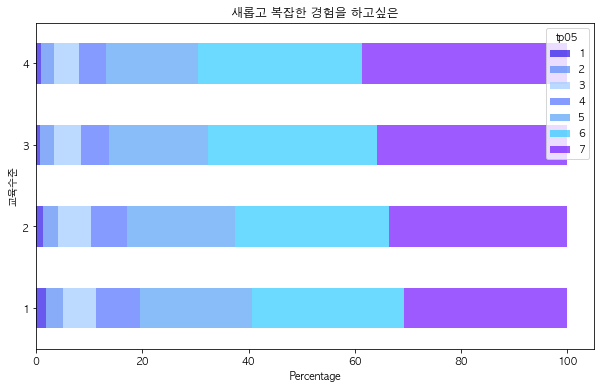

In [79]:
# tp05 응답 비율
tp05_edu.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('교육수준')
plt.title('새롭고 복잡한 경험을 하고싶은')
plt.show()

Text(0.5, 1.0, '새롭고 복잡한 경험을 하고싶은')

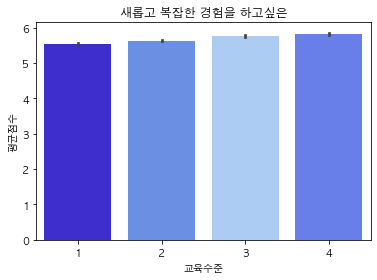

In [80]:
# tp05 응답 평균
tp5_edu = tp05[tp05['education']!=0]
sns.barplot(data=tp5_edu ,x='education',y='tp05',palette=col)
plt.ylabel('평균점수')
plt.xlabel('교육수준')
plt.title('새롭고 복잡한 경험을 하고싶은')

In [ ]:
# tp06 응답 비율
tp06_edu.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('교육수준')
plt.title('내성적이고 조용한')
plt.show()

Text(0.5, 1.0, '내성적이고 조용한')

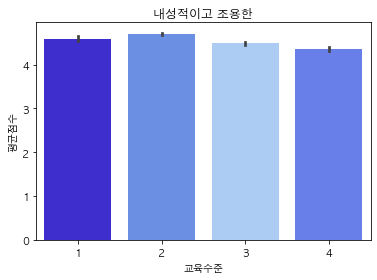

In [81]:
# tp06 응답 평균
tp6_edu = tp06[tp06['education']!=0]
sns.barplot(data=tp6_edu ,x='education',y='tp06',palette=col)
plt.ylabel('평균점수')
plt.xlabel('교육수준')
plt.title('내성적이고 조용한')

> 교육수준이 높을수록 본인이 새롭고 복잡한 경험을 할 준비가 되어있었다. 그리고 교육수준이 낮을수록 말수가 적고 조용하다는 문항의 답변이 5이상의 비율이 많았다.

##### tp07/08

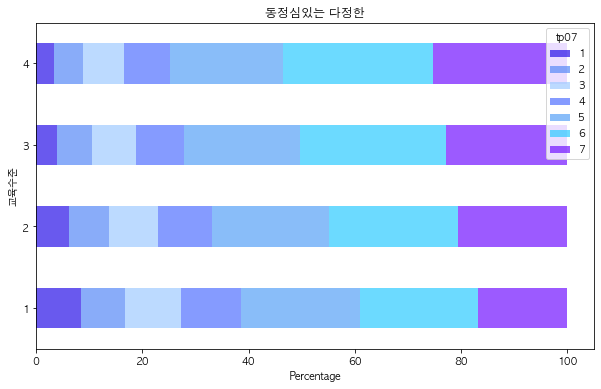

In [82]:
# tp07 응답 비율
tp07_edu.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('교육수준')
plt.title('동정심있는 다정한')
plt.show()

Text(0.5, 1.0, '동정심있는 다정한')

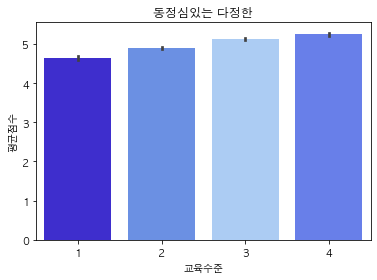

In [84]:
# tp07 응답 평균
tp7_edu = tp07[tp07['education']!=0]
sns.barplot(data=tp7_edu ,x='education',y='tp07',palette=col)
plt.ylabel('평균점수')
plt.xlabel('교육수준')
plt.title('동정심있는 다정한')

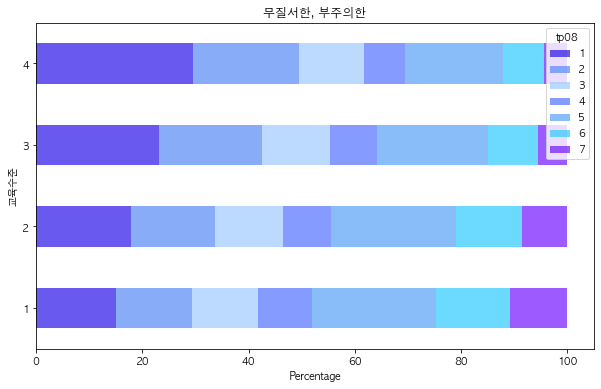

In [85]:
# tp08 응답 비율
tp08_edu.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('교육수준')
plt.title('무질서한, 부주의한')
plt.show()

Text(0.5, 1.0, '무질서한, 부주의한')

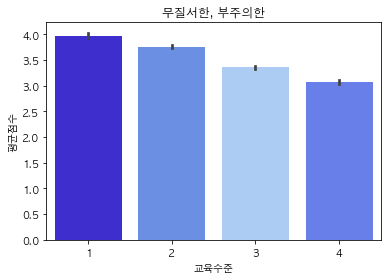

In [86]:
# tp08 응답 평균
tp8_edu = tp08[tp08['education']!=0]
sns.barplot(data=tp8_edu ,x='education',y='tp08',palette=col)
plt.ylabel('평균점수')
plt.xlabel('교육수준')
plt.title('무질서한, 부주의한')

> 교육 수준이 높을수록 tp07문항에 더욱 동의했으며 tp08의 경우 교육수준에 높을수록 비동의하는 경향이 있다. 

##### tp09/10

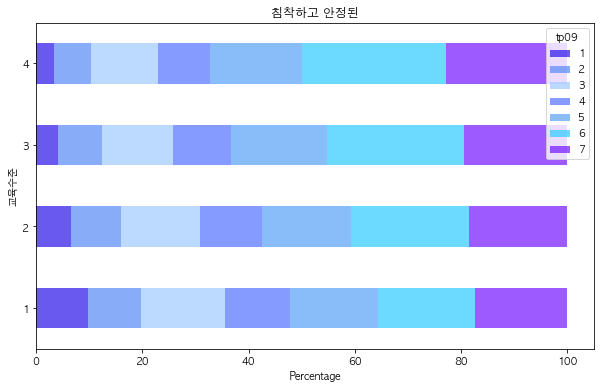

In [87]:
# tp09 응답 비율
tp09_edu.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('교육수준')
plt.title('침착하고 안정된')
plt.show()

Text(0.5, 1.0, '침착하고 안정된')

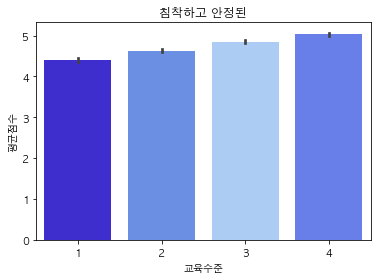

In [88]:
# tp09 응답 평균
tp9_edu = tp09[tp09['education']!=0]
sns.barplot(data=tp9_edu ,x='education',y='tp09',palette=col)
plt.ylabel('평균점수')
plt.xlabel('교육수준')
plt.title('침착하고 안정된')

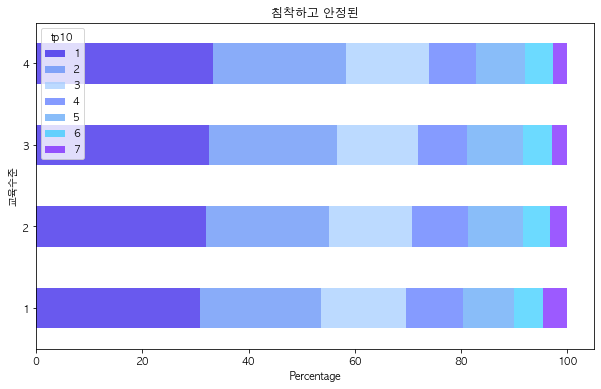

In [89]:
# tp10 응답 비율
tp10_edu.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('교육수준')
plt.title('침착하고 안정된')
plt.show()

Text(0.5, 1.0, '침착하고 안정된')

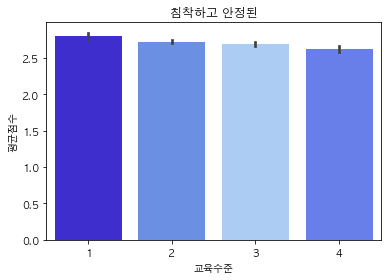

In [91]:
# tp10 응답 평균
tp10_edu = tp10[tp10['education']!=0]
sns.barplot(data=tp10_edu ,x='education',y='tp10',palette=col)
plt.ylabel('평균점수')
plt.xlabel('교육수준')
plt.title('침착하고 안정된')

> 교육수준이 올라갈수록 자신이 침착하고 기분이 안정되어 있다고 느끼며 교육수준이 낮을수록 자신이 변화를 싫어하고 창의적이지 않다고 생각한다

#### 형제자매 수에 따른 성격 변화

In [96]:
#피벗테이블 생성
for i in ['tp01','tp02','tp03','tp04','tp05','tp06','tp07','tp08','tp08','tp09','tp10']:
    globals()['{}_fam'.format(i)] = pd.pivot_table(data=globals()['{}'.format(i)], index='familysize', columns=i,aggfunc='size')
    globals()['{}_fam'.format(i)] = globals()['{}_fam'.format(i)].div(globals()['{}_fam'.format(i)].sum(axis=1), axis=0) * 100

##### tp01/02

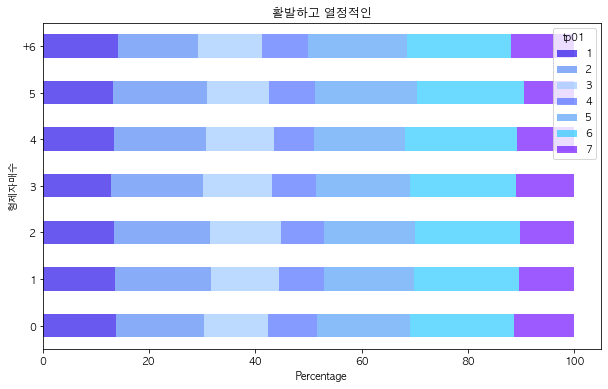

In [98]:
# tp01응답 비율
tp01_fam.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('형제자매수')
plt.title('활발하고 열정적인')
plt.show()

Text(0.5, 1.0, '활발하고 열정적인')

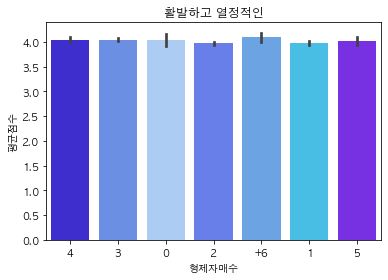

In [99]:
# tp01 응답 평균
sns.barplot(data=tp01 ,x='familysize',y='tp01',palette=col)
plt.ylabel('평균점수')
plt.xlabel('형제자매수')
plt.title('활발하고 열정적인')

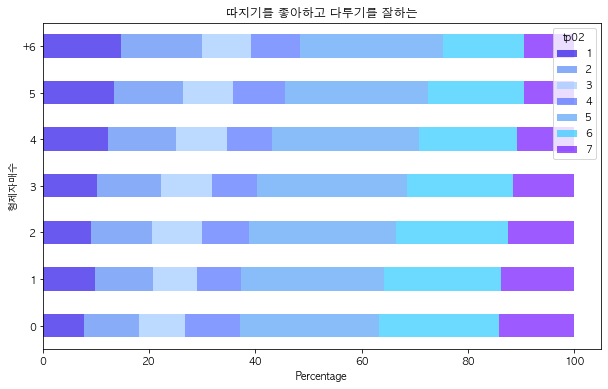

In [100]:
# tp02 응답 비율
tp02_fam.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('형제자매수')
plt.title('따지기를 좋아하고 다투기를 잘하는')
plt.show()

Text(0.5, 1.0, '따지기를 좋아하고 다투기를 잘하는')

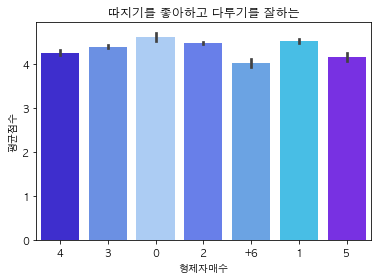

In [101]:
# tp02 응답 평균
sns.barplot(data=tp02 ,x='familysize',y='tp02',palette=col)
plt.ylabel('평균점수')
plt.xlabel('형제자매수')
plt.title('따지기를 좋아하고 다투기를 잘하는')

> 형제자매수는 외향적인 성격특성에 영향을 미치지 않는다. 그리고 형제자매수가 증가함에 따라 싸우기를 좋아하는 성향이 줄어든다. 

##### tp03/04

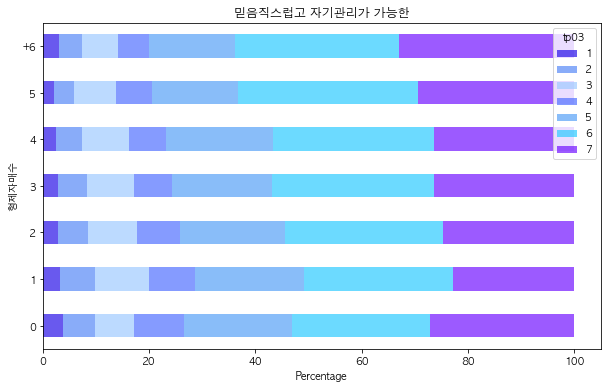

In [102]:
# tp03 응답 비율
tp03_fam.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('형제자매수')
plt.title('믿음직스럽고 자기관리가 가능한')
plt.show()

Text(0.5, 1.0, '믿음직스럽고 자기관리가 가능한')

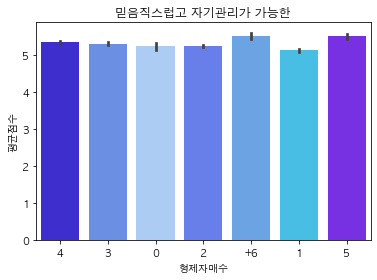

In [103]:
# tp03 응답 평균
sns.barplot(data=tp03 ,x='familysize',y='tp03',palette=col)
plt.ylabel('평균점수')
plt.xlabel('형제자매수')
plt.title('믿음직스럽고 자기관리가 가능한')

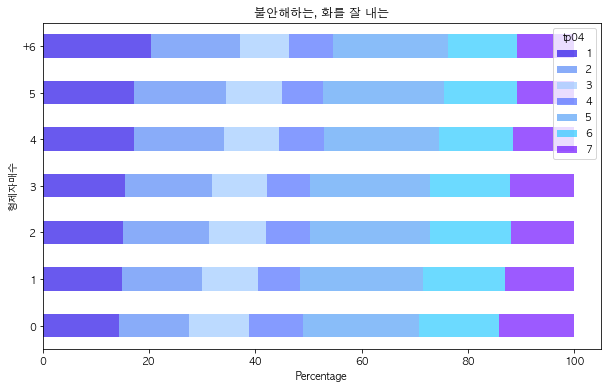

In [104]:
# tp04 응답 비율
tp04_fam.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('형제자매수')
plt.title('불안해하는, 화를 잘 내는')
plt.show()

Text(0.5, 1.0, '불안해하는, 화를 잘 내는')

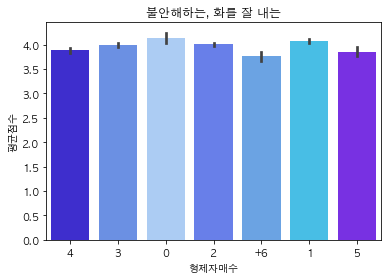

In [105]:
# tp04 응답 평균
sns.barplot(data=tp04 ,x='familysize',y='tp04',palette=col)
plt.ylabel('평균점수')
plt.xlabel('형제자매수')
plt.title('불안해하는, 화를 잘 내는')

> tp03의 경우 유의미한 결과라고 보기는 어려울 것 같다. 하지만 형제자매수가 많을수록 불안해하는 성격이라는 것에 동의하는 비율이 낮아지는 것을 알 수 있다.

##### tp05/06

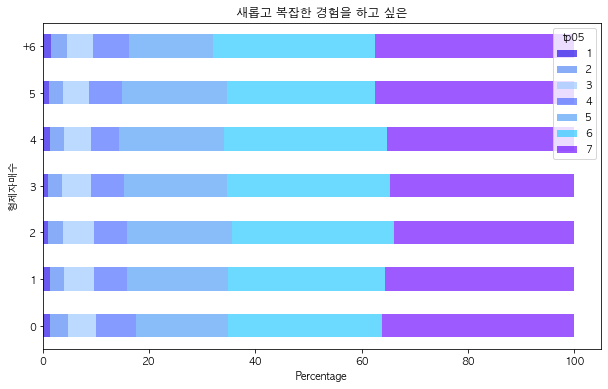

In [106]:
# tp05 응답 비율
tp05_fam.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('형제자매수')
plt.title('새롭고 복잡한 경험을 하고 싶은')
plt.show()

Text(0.5, 1.0, '새롭고 복잡한 경험을 하고 싶은')

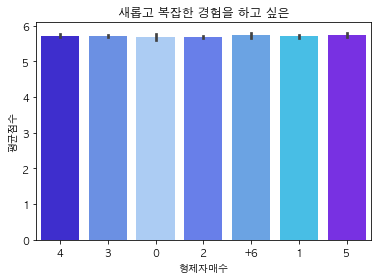

In [107]:
# tp05 응답 평균
sns.barplot(data=tp05 ,x='familysize',y='tp05',palette=col)
plt.ylabel('평균점수')
plt.xlabel('형제자매수')
plt.title('새롭고 복잡한 경험을 하고 싶은')

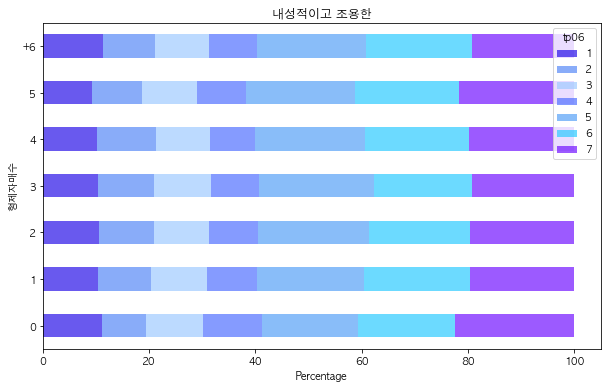

In [108]:
# tp06 응답 비율
tp06_fam.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('형제자매수')
plt.title('내성적이고 조용한')
plt.show()

Text(0.5, 1.0, '내성적이고 조용한')

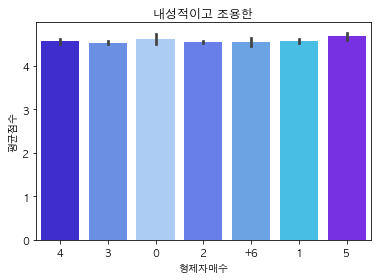

In [109]:
# tp06 응답 평균
sns.barplot(data=tp06 ,x='familysize',y='tp06',palette=col)
plt.ylabel('평균점수')
plt.xlabel('형제자매수')
plt.title('내성적이고 조용한')

> tp05의 경우 가족 구성원 수에 따라 답변한 비율이 거의 비슷하였고 따라서 평균 또한 비슷하였다. tp06의 경우 가족 구성원이 5인 경우를 제외하고, 가족 구성원 수가 증가할수록 조용하다에 강하게 동의한 비율이 감소하는 추세를 보인다

##### tp07/08

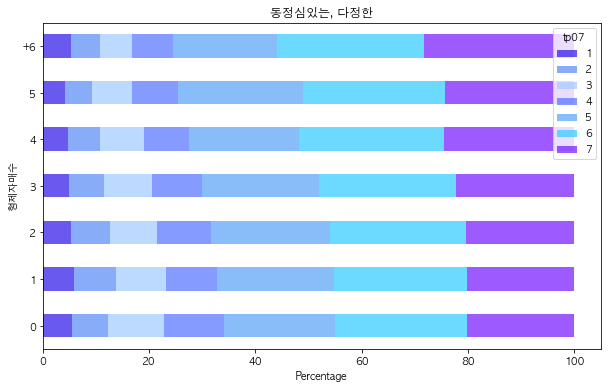

In [110]:
# tp07 응답 비율
tp07_fam.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('형제자매수')
plt.title('동정심있는, 다정한')
plt.show()

Text(0.5, 1.0, '동정심있는, 다정한')

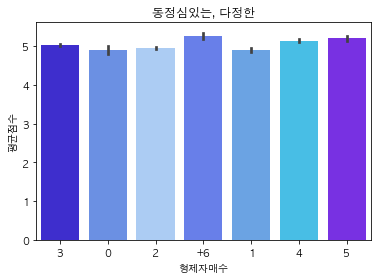

In [111]:
# tp07 응답 평균
sns.barplot(data=tp07 ,x='familysize',y='tp07',palette=col)
plt.ylabel('평균점수')
plt.xlabel('형제자매수')
plt.title('동정심있는, 다정한')

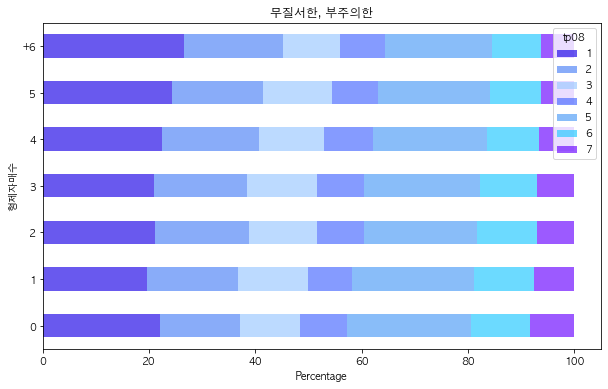

In [112]:
# tp08 응답 비율
tp08_fam.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('형제자매수')
plt.title('무질서한, 부주의한')
plt.show()

Text(0.5, 1.0, '무질서한, 부주의한')

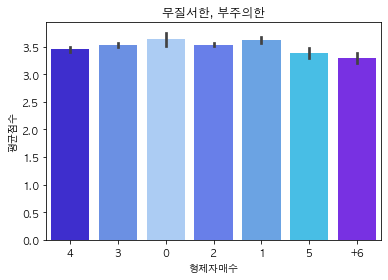

In [113]:
# tp08 응답 평균
sns.barplot(data=tp08 ,x='familysize',y='tp08',palette=col)
plt.ylabel('평균점수')
plt.xlabel('형제자매수')
plt.title('무질서한, 부주의한')

> tp07의 경우 구성원 수가 많을수록 해당 문항에 동의하는 경향성이 보인다. tp08의 경우 구성원 수가 많을수록 비동의하는 경향이 있다

##### tp09/10

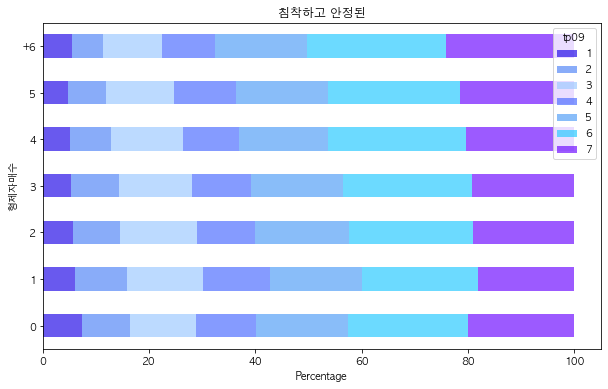

In [114]:
# tp09 응답 비율
tp09_fam.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('형제자매수')
plt.title('침착하고 안정된')
plt.show()

Text(0.5, 1.0, '침착하고 안정된')

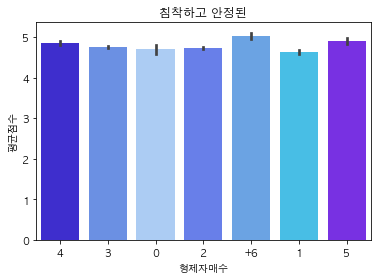

In [115]:
# tp09 응답 평균
sns.barplot(data=tp09 ,x='familysize',y='tp09',palette=col)
plt.ylabel('평균점수')
plt.xlabel('형제자매수')
plt.title('침착하고 안정된')

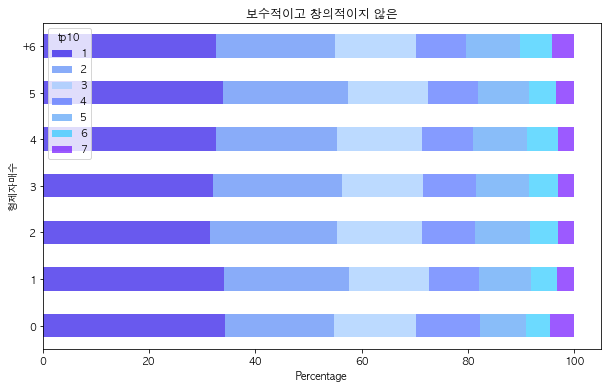

In [116]:
# tp10 응답 비율
tp10_fam.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('형제자매수')
plt.title('보수적이고 창의적이지 않은')
plt.show()

Text(0.5, 1.0, '보수적이고 창의적이지 않은')

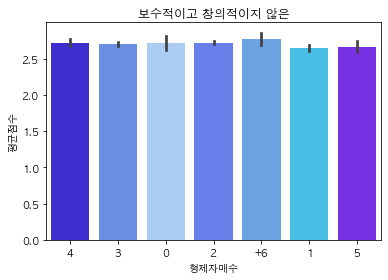

In [117]:
# tp10 응답 평균
sns.barplot(data=tp10 ,x='familysize',y='tp10',palette=col)
plt.ylabel('평균점수')
plt.xlabel('형제자매수')
plt.title('보수적이고 창의적이지 않은')

> 가족구성원수가 많을수록 자신이 침착하며 기분이 안정되어 있다고 느끼며 가족구성원 수와 보수적, 창의성과는 관련이 없는 것으로 보인다

#### 결혼유무에 따른 성격 변화

In [118]:
#피벗테이블 생성
for i in ['tp01','tp02','tp03','tp04','tp05','tp06','tp07','tp08','tp08','tp09','tp10']:
    globals()['{}_mar'.format(i)] = pd.pivot_table(data=globals()['{}'.format(i)], index='married', columns=i,aggfunc='size')
    globals()['{}_mar'.format(i)] = globals()['{}_mar'.format(i)].div(globals()['{}_mar'.format(i)].sum(axis=1), axis=0) * 100

##### tp01/02

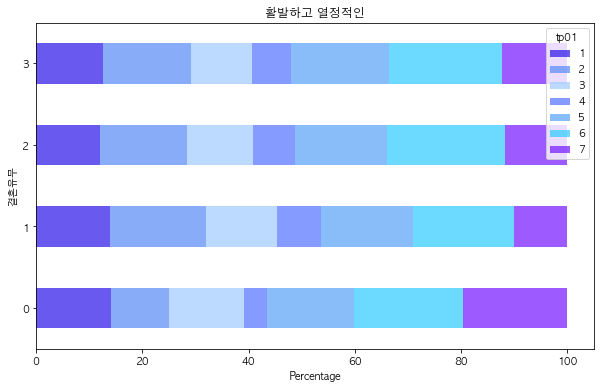

In [119]:
# tp01응답 비율
tp01_mar.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('결혼유무')
plt.title('활발하고 열정적인')
plt.show()

Text(0.5, 1.0, '활발하고 열정적인')

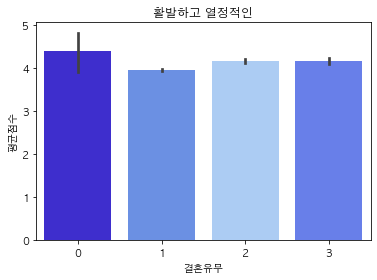

In [120]:
# tp01 응답 평균
sns.barplot(data=tp01 ,x='married',y='tp01',palette=col)
plt.ylabel('평균점수')
plt.xlabel('결혼유무')
plt.title('활발하고 열정적인')

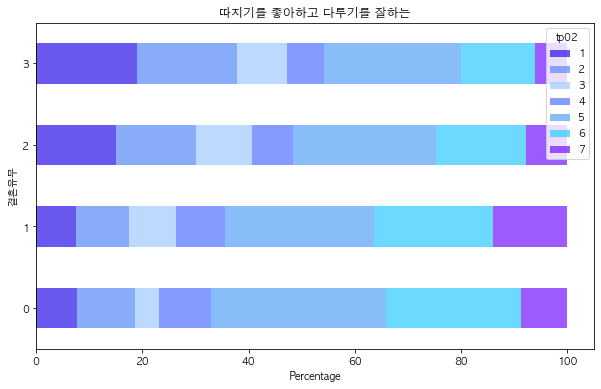

In [121]:
# tp02 응답 비율
tp02_mar.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('결혼유무')
plt.title('따지기를 좋아하고 다투기를 잘하는')
plt.show()

Text(0.5, 1.0, '따지기를 좋아하고 다투기를 잘하는')

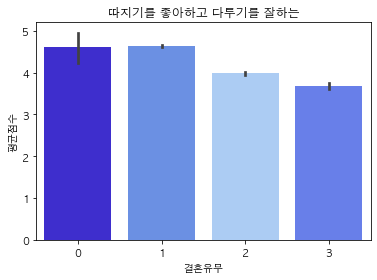

In [122]:
# tp02 응답 평균
sns.barplot(data=tp02 ,x='married',y='tp02',palette=col)
plt.ylabel('평균점수')
plt.xlabel('결혼유무')
plt.title('따지기를 좋아하고 다투기를 잘하는')

> 결혼을 해본 사람이 결혼을 안 해본 사람에 비해 약간 더 외향적이다. 현재 결혼 상태에 있는 사람과 이혼한 사람은 차이가 없다.
결혼을 안 해본 사람이 결혼을 해본 사람에 비해 싸우기를 좋아하는 성향을 지닌다. 또한, 현재 결혼 상태에 있는 사람이 이혼한 사람보다 싸우기를 좋아하는 성향을 지닌다.

##### tp03/04

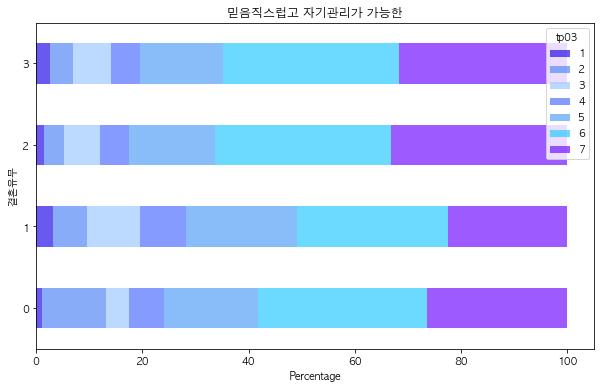

In [123]:
# tp03 응답 비율
tp03_mar.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('결혼유무')
plt.title('믿음직스럽고 자기관리가 가능한')
plt.show()

Text(0.5, 1.0, '믿음직스럽고 자기관리가 가능한')

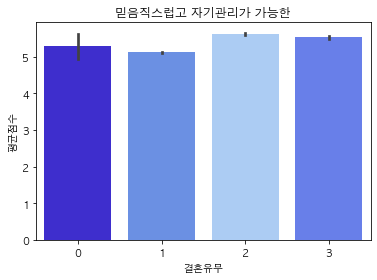

In [124]:
# tp03 응답 평균
sns.barplot(data=tp03 ,x='married',y='tp03',palette=col)
plt.ylabel('평균점수')
plt.xlabel('결혼유무')
plt.title('믿음직스럽고 자기관리가 가능한')

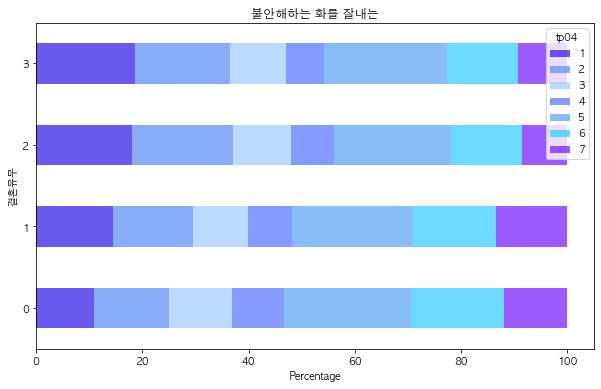

In [125]:
# tp04 응답 비율
tp04_mar.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('결혼유무')
plt.title('불안해하는 화를 잘내는')
plt.show()

Text(0.5, 1.0, '불안해하는 화를 잘내는')

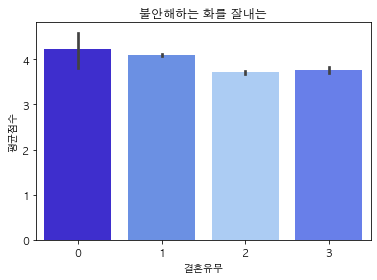

In [126]:
# tp04 응답 평균
sns.barplot(data=tp04 ,x='married',y='tp04',palette=col)
plt.ylabel('평균점수')
plt.xlabel('결혼유무')
plt.title('불안해하는 화를 잘내는')

> 한 번이라도 결혼해 본 사람들이 결혼을 한번도 안 해본 사람에 비해 본인이 신뢰할 수 있는 성격의 소유자라는 것에 더 강력하게 동의하는 경향이 나타났다.현재 결혼한 상태인 사람들과 이혼한 상태인 사람들을 비교해보면, 현재 결혼한 상태의 사람들이 이혼한 상태의 사람들에 비해 본인이 신뢰할 수 있는 성격이라는 것에 동의하는 비율이 약간 더 높았다.
한 번이라도 결혼해 본 사람들이 결혼을 한번도 안 해본 사람에 비해 본인이 불안해하는 성격의 소유자라는 것에 동의하지 않는 경향이 나타났다.현재 결혼한 상태인 사람들과 이혼한 상태인 사람들 사이에서는 차이가 없이 거의 동일한 평균이 나타났다.

##### tp05/06

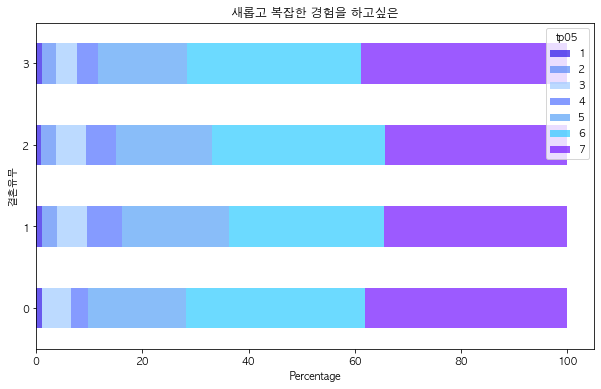

In [127]:
# tp05 응답 비율
tp05_mar.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('결혼유무')
plt.title('새롭고 복잡한 경험을 하고싶은')
plt.show()

Text(0.5, 1.0, '새롭고 복잡한 경험을 하고싶은')

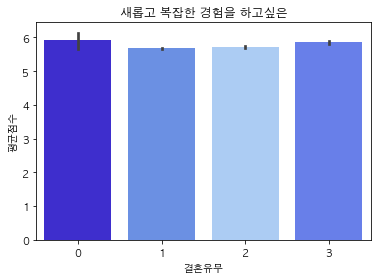

In [128]:
# tp05 응답 평균
sns.barplot(data=tp05 ,x='married',y='tp05',palette=col)
plt.ylabel('평균점수')
plt.xlabel('결혼유무')
plt.title('새롭고 복잡한 경험을 하고싶은')

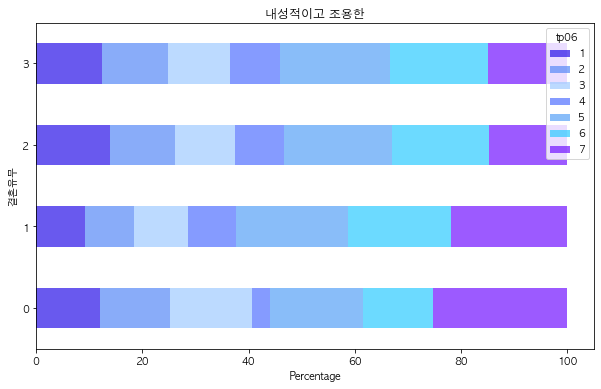

In [129]:
# tp06 응답 비율
tp06_mar.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('결혼유무')
plt.title('내성적이고 조용한')
plt.show()

Text(0.5, 1.0, '내성적이고 조용한')

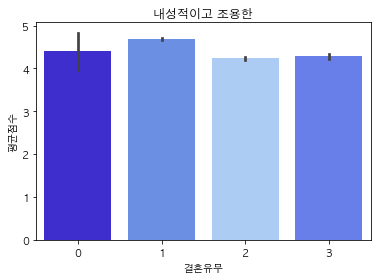

In [130]:
# tp06 응답 평균
sns.barplot(data=tp06 ,x='married',y='tp06',palette=col)
plt.ylabel('평균점수')
plt.xlabel('결혼유무')
plt.title('내성적이고 조용한')

> 결혼한 지 좀 된 사람이 새로운 경험을 추구하는 성향이 있는 듯 하다. 그리고 결혼을 하지 않은 사람이 유의하게 조용하고, 결혼 시기에 관계없이 결혼한 사람들은 답변의 분포가 거의 동일하다.

##### tp07/08

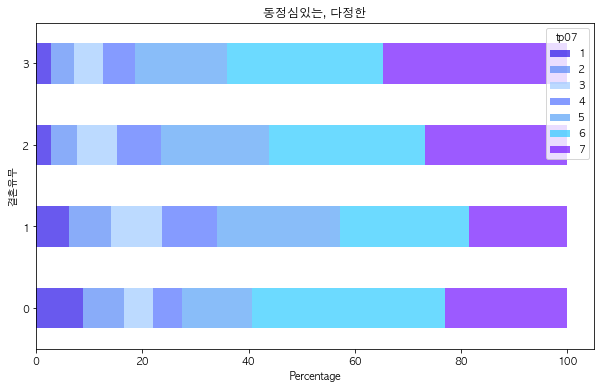

In [131]:
# tp07 응답 비율
tp07_mar.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('결혼유무')
plt.title('동정심있는, 다정한')
plt.show()

Text(0.5, 1.0, '동정심있는, 다정한')

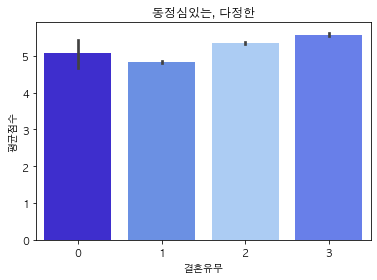

In [132]:
# tp07 응답 평균
sns.barplot(data=tp07 ,x='married',y='tp07',palette=col)
plt.ylabel('평균점수')
plt.xlabel('결혼유무')
plt.title('동정심있는, 다정한')

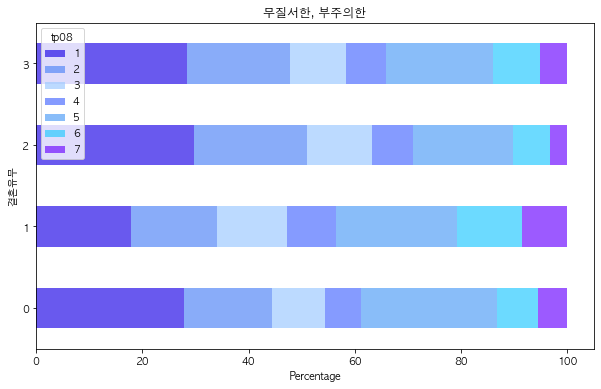

In [133]:
# tp08 응답 비율
tp08_mar.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('결혼유무')
plt.title('무질서한, 부주의한')
plt.show()

Text(0.5, 1.0, '무질서한, 부주의한')

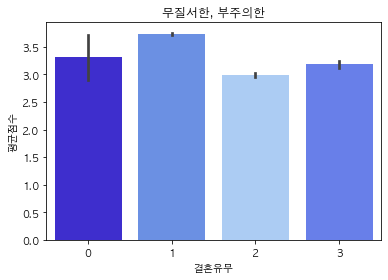

In [134]:
# tp08 응답 평균
sns.barplot(data=tp08 ,x='married',y='tp08',palette=col)
plt.ylabel('평균점수')
plt.xlabel('결혼유무')
plt.title('무질서한, 부주의한')

> 결혼 경험이 있는 사람이 아닌 사람에 비해 동의하는 비율이 높다. 그리고 결혼 경험이 있는 사람이 아닌 사람에 비해 동의하지 않는 비율이 높다.

##### tp09/10

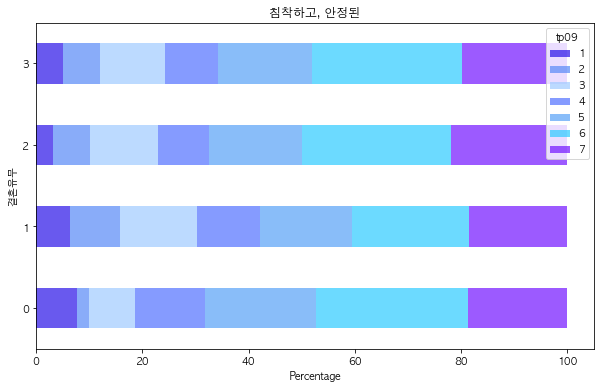

In [135]:
# tp09 응답 비율
tp09_mar.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('결혼유무')
plt.title('침착하고, 안정된')
plt.show()

Text(0.5, 1.0, '침착하고, 안정된')

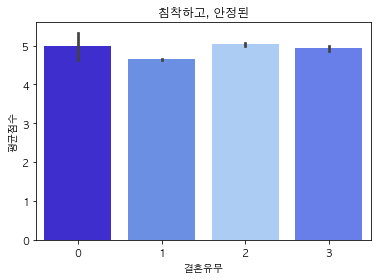

In [136]:
# tp09 응답 평균
sns.barplot(data=tp09 ,x='married',y='tp09',palette=col)
plt.ylabel('평균점수')
plt.xlabel('결혼유무')
plt.title('침착하고, 안정된')

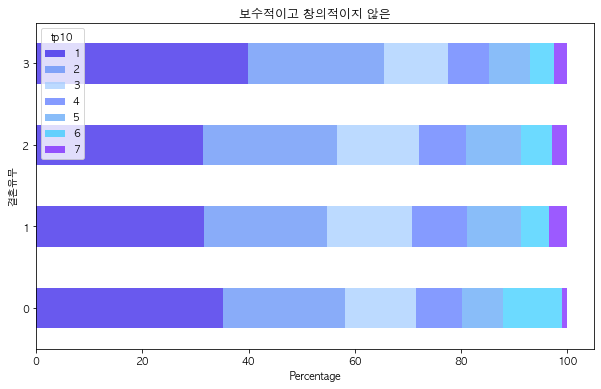

In [137]:
# tp10 응답 비율
tp10_mar.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('결혼유무')
plt.title('보수적이고 창의적이지 않은')
plt.show()

Text(0.5, 1.0, '보수적이고 창의적이지 않은')

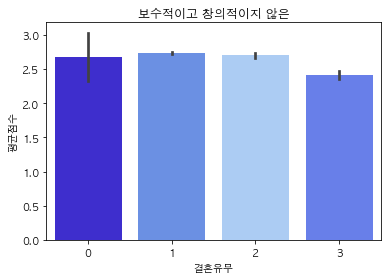

In [138]:
# tp10 응답 평균
sns.barplot(data=tp10 ,x='married',y='tp10',palette=col)
plt.ylabel('평균점수')
plt.xlabel('결혼유무')
plt.title('보수적이고 창의적이지 않은')

> 기혼 > 이혼 > 미혼의 순서로 자신이 침착하며 기분이 안정되어 있다고 느끼며 이혼 < 기혼 < 미혼의 순서로 자신이 변화를 싫어하며 창의적이지 않다고 생각하지 않음

#### 유년기 배경에 따른 성격 변화

In [139]:
#피벗테이블 생성
for i in ['tp01','tp02','tp03','tp04','tp05','tp06','tp07','tp08','tp08','tp09','tp10']:
    globals()['{}_urban'.format(i)] = pd.pivot_table(data=globals()['{}'.format(i)], index='urban', columns=i,aggfunc='size')
    globals()['{}_urban'.format(i)] = globals()['{}_urban'.format(i)].div(globals()['{}_urban'.format(i)].sum(axis=1), axis=0) * 100
    globals()['{}_urban'.format(i)].drop([0], inplace=True)

##### tp01/02

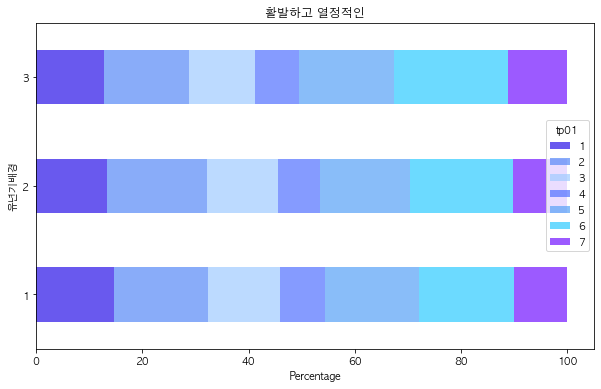

In [140]:
# tp01응답 비율
tp01_urban.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('유년기배경')
plt.title('활발하고 열정적인')
plt.show()

Text(0.5, 1.0, '활발하고 열정적인')

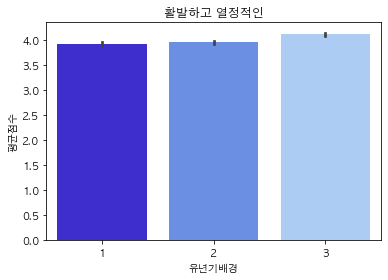

In [141]:
# tp01 응답 평균
tp1_urban = tp01[tp01['urban']!=0]
sns.barplot(data=tp1_urban ,x='urban',y='tp01',palette=col)
plt.ylabel('평균점수')
plt.xlabel('유년기배경')
plt.title('활발하고 열정적인')

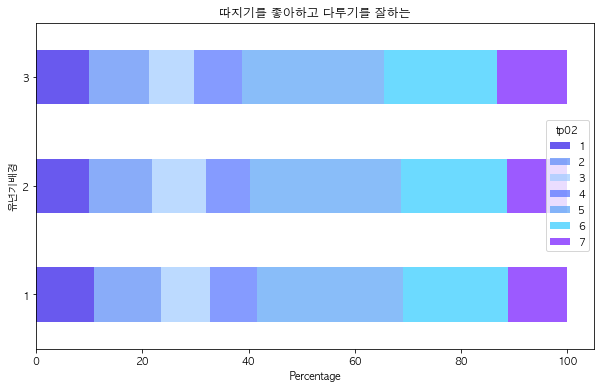

In [142]:
# tp02 응답 비율
tp02_urban.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('유년기배경')
plt.title('따지기를 좋아하고 다투기를 잘하는')
plt.show()

Text(0.5, 1.0, '따지기를 좋아하고 다투기를 잘하는')

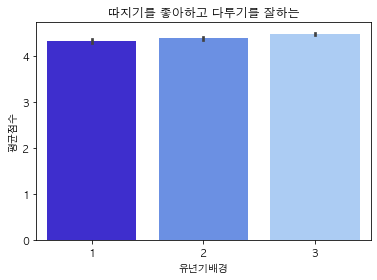

In [143]:
# tp02 응답 평균
tp2_urban = tp02[tp02['urban']!=0]
sns.barplot(data=tp2_urban ,x='urban',y='tp02',palette=col)
plt.ylabel('평균점수')
plt.xlabel('유년기배경')
plt.title('따지기를 좋아하고 다투기를 잘하는')

> 어렸을 때 시골에 산 사람들이 약간 덜 외향적이다. 그리고 도시에 살수록 따지기를 좋아하고 다투기를 잘한다.

##### tp03/04

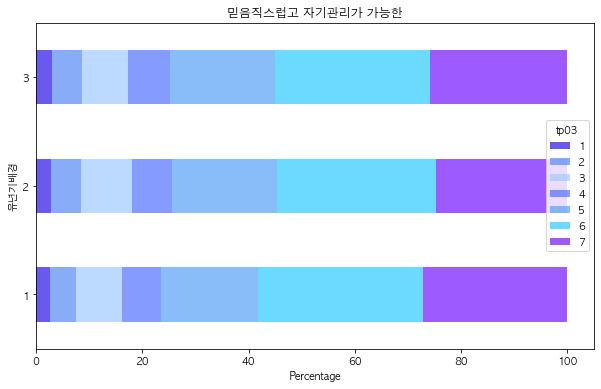

In [144]:
# tp03 응답 비율
tp03_urban.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('유년기배경')
plt.title('믿음직스럽고 자기관리가 가능한')
plt.show()

Text(0.5, 1.0, '믿음직스럽고 자기관리가 가능한')

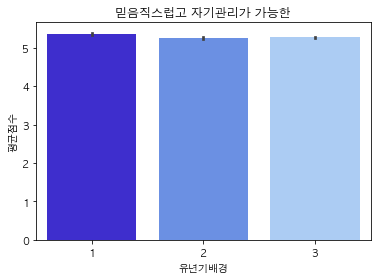

In [146]:
# tp03 응답 평균
tp3_urban = tp03[tp03['urban']!=0]
sns.barplot(data=tp3_urban ,x='urban',y='tp03',palette=col)
plt.ylabel('평균점수')
plt.xlabel('유년기배경')
plt.title('믿음직스럽고 자기관리가 가능한')

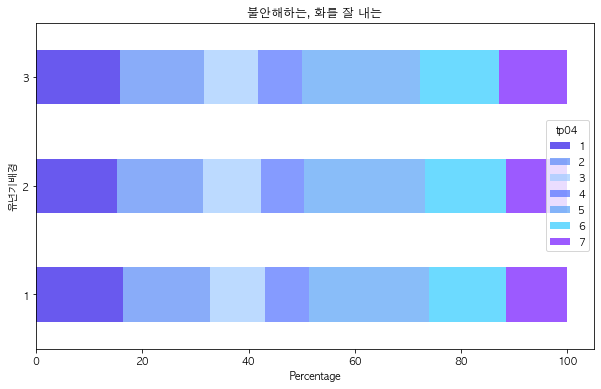

In [147]:
# tp04 응답 비율
tp04_urban.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('유년기배경')
plt.title('불안해하는, 화를 잘 내는')
plt.show()

Text(0.5, 1.0, '불안해하는, 화를 잘 내는')

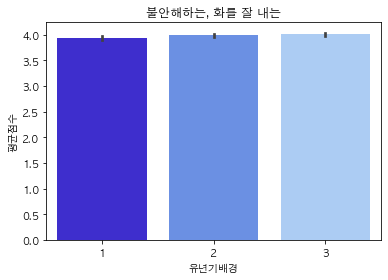

In [149]:
# tp04 응답 평균
tp4_urban = tp04[tp04['urban']!=0]
sns.barplot(data=tp4_urban ,x='urban',y='tp04',palette=col)
plt.ylabel('평균점수')
plt.xlabel('유년기배경')
plt.title('불안해하는, 화를 잘 내는')

> 유년기 거주지역은 신뢰할 수 있는 성격과 불안해하는 성격 모두에서 비율 혹은 평균을 비교해보아도 둘다 큰 차이가 나타나지 않아서 이 환경적 요인에 따라서는 성격에 유의미한 차이를 일으킨다고 보기 힘들다.

##### tp05/06

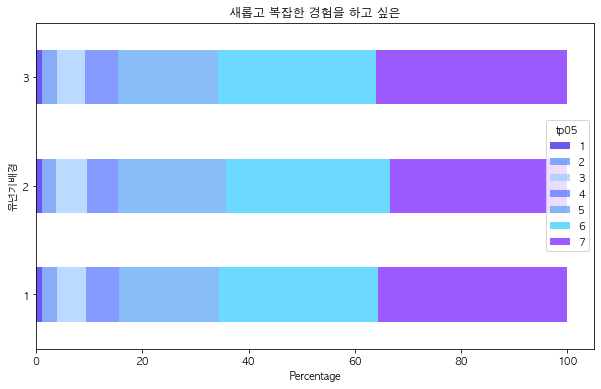

In [150]:
# tp05 응답 비율
tp05_urban.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('유년기배경')
plt.title('새롭고 복잡한 경험을 하고 싶은')
plt.show()

Text(0.5, 1.0, '새롭고 복잡한 경험을 하고 싶은')

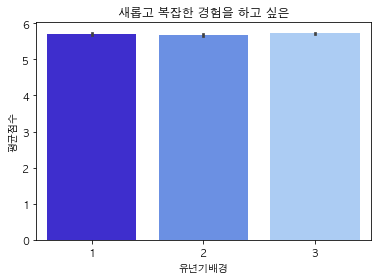

In [151]:
# tp05 응답 평균
tp5_urban = tp05[tp05['urban']!=0]
sns.barplot(data=tp5_urban ,x='urban',y='tp05',palette=col)
plt.ylabel('평균점수')
plt.xlabel('유년기배경')
plt.title('새롭고 복잡한 경험을 하고 싶은')

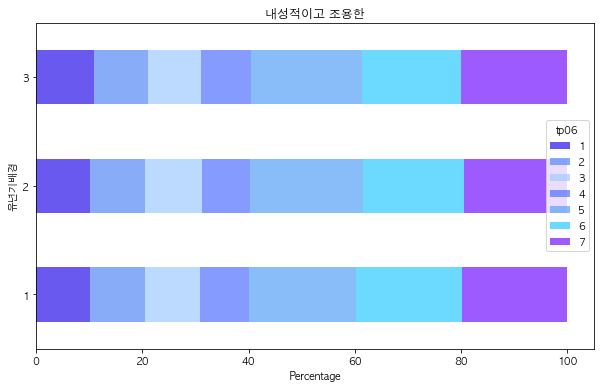

In [152]:
# tp06 응답 비율
tp06_urban.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('유년기배경')
plt.title('내성적이고 조용한')
plt.show()

Text(0.5, 1.0, '내성적이고 조용한')

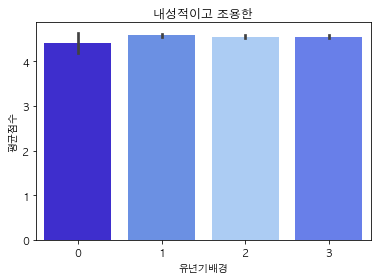

In [153]:
# tp06 응답 평균
tp6_urban = tp06[tp06['urban']!=0]
sns.barplot(data=tp06 ,x='urban',y='tp06',palette=col)
plt.ylabel('평균점수')
plt.xlabel('유년기배경')
plt.title('내성적이고 조용한')

> 유년기 거주지역은 두 질문 모두에 관계없이 거의 일정한 분포, 일정한 평균을 보였다.

##### tp07/08

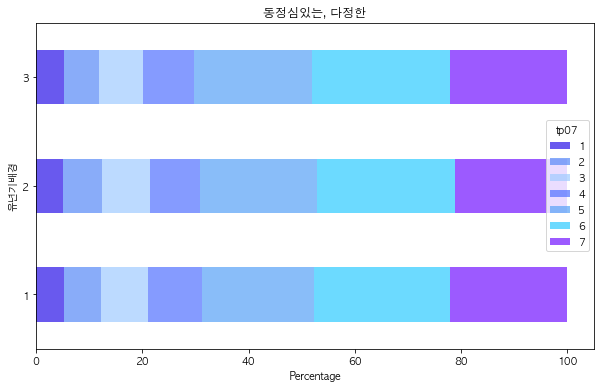

In [154]:
# tp07 응답 비율
tp07_urban.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('유년기배경')
plt.title('동정심있는, 다정한')
plt.show()

Text(0.5, 1.0, '동정심있는, 다정한')

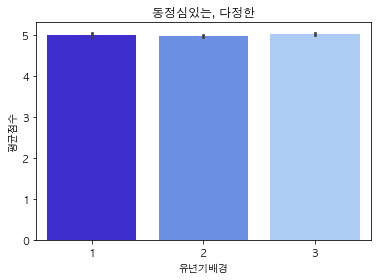

In [155]:
# tp07 응답 평균
tp7_urban = tp07[tp07['urban']!=0]
sns.barplot(data=tp7_urban ,x='urban',y='tp07',palette=col)
plt.ylabel('평균점수')
plt.xlabel('유년기배경')
plt.title('동정심있는, 다정한')

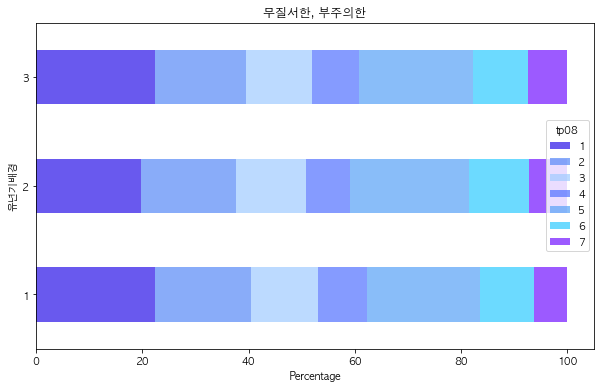

In [156]:
# tp08 응답 비율
tp08_urban.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('유년기배경')
plt.title('무질서한, 부주의한')
plt.show()

Text(0.5, 1.0, '무질서한, 부주의한')

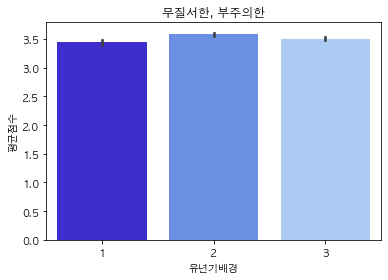

In [157]:
# tp08 응답 평균
tp8_urban = tp08[tp08['urban']!=0]
sns.barplot(data=tp8_urban ,x='urban',y='tp08',palette=col)
plt.ylabel('평균점수')
plt.xlabel('유년기배경')
plt.title('무질서한, 부주의한')

> 유년기의 거주지역은 성격 특성에 영향을 주지 않는다.

##### tp09/10

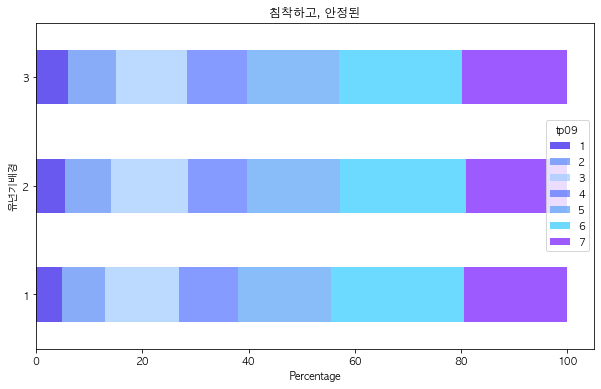

In [158]:
# tp09 응답 비율
tp09_urban.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('유년기배경')
plt.title('침착하고, 안정된')
plt.show()

Text(0.5, 1.0, '침착하고, 안정된')

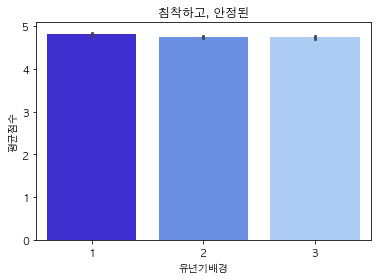

In [159]:
# tp09 응답 평균
tp9_urban = tp09[tp09['urban']!=0]
sns.barplot(data=tp9_urban ,x='urban',y='tp09',palette=col)
plt.ylabel('평균점수')
plt.xlabel('유년기배경')
plt.title('침착하고, 안정된')

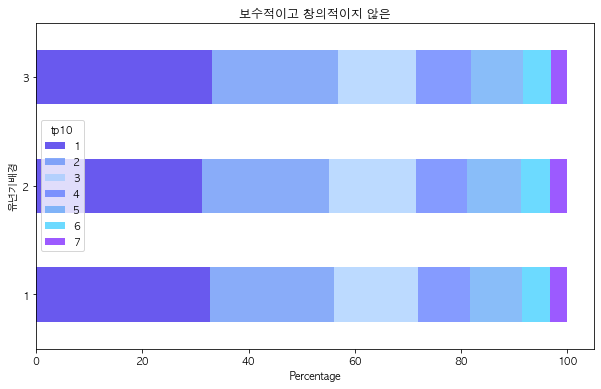

In [160]:
# tp10 응답 비율
tp10_urban.plot(kind='barh', figsize=(10,6),stacked=True, color=col,alpha = 0.7)
plt.xlabel('Percentage')
plt.ylabel('유년기배경')
plt.title('보수적이고 창의적이지 않은')
plt.show()

Text(0.5, 1.0, '보수적이고 창의적이지 않은')

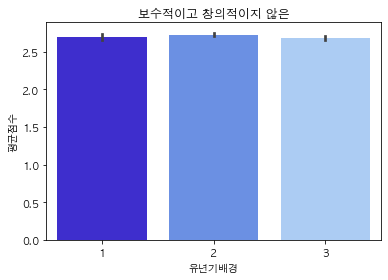

In [161]:
# tp10 응답 평균
tp10_urban = tp10[tp10['urban']!=0]
sns.barplot(data=tp10_urban ,x='urban',y='tp10',palette=col)
plt.ylabel('평균점수')
plt.xlabel('유년기배경')
plt.title('보수적이고 창의적이지 않은')

> 거의 차이는 없으나 약간의 경향성으로 유년기를 시골에서 보낸 사람들이 교외, 도시에 비해 신경질적이지 않고 교외에서 유년기를 보낸 사람들이 가장 덜 개방적이라는 것을 알 수 있음

### 분석 결과

- 연령에 영향을 받는 성격 특성 : tp01~tp10 전부
- 교육수준에 영향을 받는 성격 특성 : tp01을 제외한 전부
- 형제자매수에 영향을 받는 성격 특성 : tp02, tp04, tp09들은 강한 경향을 보여주며 tp01을 제외한 나머지에서는 약한 경향성
- 혼인상태에 영향을 받는 성격 특성 : tp01~tp10 전부
- 유년기배경에 영향을 받는 성격 특성 : tp01, tp09, tp10들은 약한 경향을 보여주며 나머지에서는 나타나지 않음